In [125]:
from skmultilearn.dataset import load_dataset
from skmultilearn.dataset import available_data_sets
import torch
import math
import copy
import numpy as np
from skmultilearn.dataset import load_from_arff
from fastai.vision.all import *
import torchvision

In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [10]:
dataset = 'bibtex'

In [33]:
X, y, feature_names, label_names = load_dataset(dataset, 'train')

bibtex:train - does not exists downloading
Downloaded bibtex-train


In [34]:
X, y, feature_names[:3], label_names[:3]

(<4880x1836 sparse matrix of type '<class 'numpy.float64'>'
 	with 334250 stored elements in List of Lists format>,
 <4880x159 sparse matrix of type '<class 'numpy.int64'>'
 	with 11616 stored elements in List of Lists format>,
 [('0', ['0', '1']), ('000', ['0', '1']), ('02', ['0', '1'])],
 [('TAG_2005', ['0', '1']),
  ('TAG_2006', ['0', '1']),
  ('TAG_2007', ['0', '1'])])

In [35]:
Xt, yt, feature_namest, label_namest = load_dataset(dataset, 'test')

bibtex:test - does not exists downloading
Downloaded bibtex-test


In [36]:
Xt, yt, feature_namest[:3], label_namest[:3]

(<2515x1836 sparse matrix of type '<class 'numpy.float64'>'
 	with 173496 stored elements in List of Lists format>,
 <2515x159 sparse matrix of type '<class 'numpy.int64'>'
 	with 6146 stored elements in List of Lists format>,
 [('0', ['0', '1']), ('000', ['0', '1']), ('02', ['0', '1'])],
 [('TAG_2005', ['0', '1']),
  ('TAG_2006', ['0', '1']),
  ('TAG_2007', ['0', '1'])])

In [37]:
xi = torch.from_numpy(Xt.toarray())

In [12]:
xi.shape

torch.Size([3000, 47236])

In [4]:
def load_arff(dataset):
    X, y, feature_names, label_names = load_dataset(dataset, 'train')
    Xt, yt, feature_namest, label_namest = load_dataset(dataset, 'test')
    xm = torch.cat([torch.from_numpy(X.toarray()), torch.from_numpy(Xt.toarray())], dim = 0)
    ym = torch.cat([torch.from_numpy(y.toarray()), torch.from_numpy(yt.toarray())], dim = 0)
    return xm, ym

In [12]:
a, b = load_arff('bibtex')
print(a.shape, b.shape)

bibtex:train - exists, not redownloading
bibtex:test - exists, not redownloading
torch.Size([7395, 1836]) torch.Size([7395, 159])


In [6]:
def divide(x, y, per):
    lenx, leny = x.shape[1], y.shape[1]
    mx, my = math.floor(lenx * per), math.floor(leny * per)
    indicesx = torch.randperm(lenx)
    indicesy = torch.randperm(leny)
    xn = x[:,indicesx[:mx]].detach().clone()
    yn = y[:,indicesy[:my]].detach().clone()
    return xn, yn

In [40]:
an, bn = divide(a, b, 0.9)

In [41]:
an.shape

torch.Size([7395, 1652])

In [42]:
bn.shape

torch.Size([7395, 143])

In [43]:
def te(x):
    x = 5
u = 6
te(u)
u

6

In [9]:
ind = np.arange(0, 98)
print(ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97]


In [14]:
path_to_arff_file = 'data/bibtex/bibtex.arff'
label_count = 159
label_location="end"
arff_file_is_sparse = False
X, y = load_from_arff(
    path_to_arff_file,
    label_count=label_count,
    label_location=label_location,
    load_sparse=arff_file_is_sparse
)

AttributeError: module 'arff' has no attribute 'DENSE'

In [6]:
from PIL import Image

In [98]:
#img = Image.open(r"pubby.jpg")
#img = PILImage(PILImage.create(r"pubby.jpg").resize((300,500)))
img = Image.open(r"images.jpg").convert('RGB')

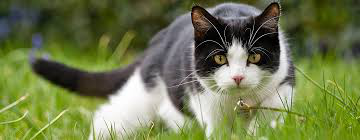

In [99]:
img

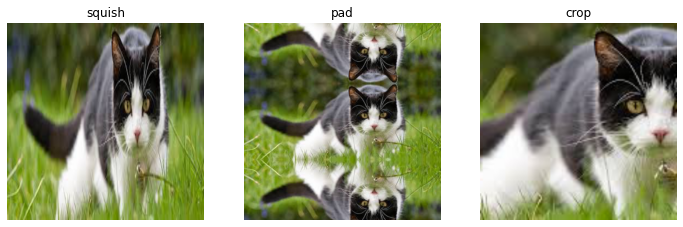

In [107]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,method in zip(axs.flatten(), [ResizeMethod.Squish, ResizeMethod.Pad, ResizeMethod.Crop]):
    rsz = Resize(600, method=method)
    show_image(rsz(img, split_idx=1), ctx=ax, title=method);

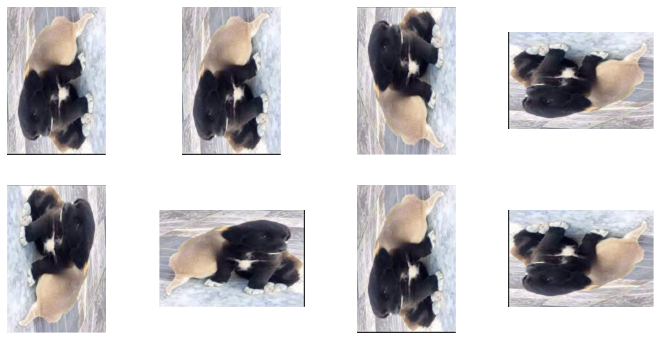

In [19]:
_,axs = subplots(2, 4)
for ax in axs.flatten():
    show_image(DihedralItem(p=1.)(img, split_idx=0), ctx=ax)

1: True


True

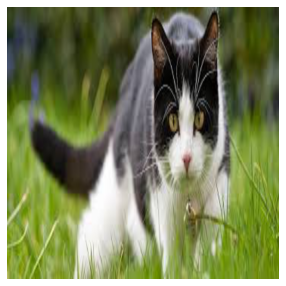

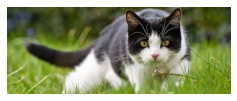

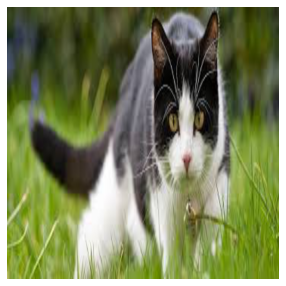

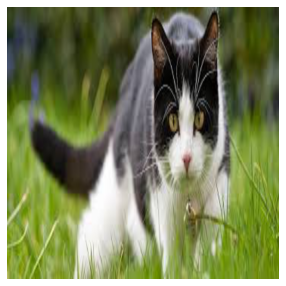

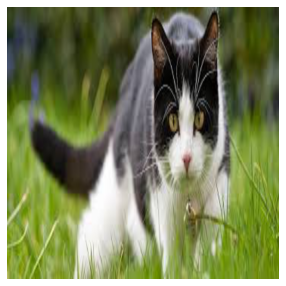

In [106]:
size = 600
rsz = Resize(size, method=ResizeMethod.Squish)
show_image(rsz(img, split_idx=1))
ip = rsz(img, split_idx=1)
show_image(img)
show_image(ip)
show_image(ip.resize((size, size), Image.BILINEAR))
show_image(img.resize((size, size), Image.BILINEAR))
img1 = ip.resize((size, size), Image.BILINEAR)
img2 = img.resize((size, size), Image.BILINEAR)
print('1:',img1 == ip)
img1 == img2

In [66]:
img.resize((128, 128), Image.BILINEAR)

False

In [44]:
policies = [
            ['Invert', 0.1, 7, 'Contrast', 0.2, 6],
            ['Rotate', 0.7, 2, 'TranslateX', 0.3, 9],
            ['Sharpness', 0.8, 1, 'Sharpness', 0.9, 3],
            ['ShearY', 0.5, 8, 'TranslateY', 0.7, 9],
            ['AutoContrast', 0.5, 8, 'Equalize', 0.9, 2],
            ['ShearY', 0.2, 7, 'Posterize', 0.3, 7],
            ['Color', 0.4, 3, 'Brightness', 0.6, 7],
            ['Sharpness', 0.3, 9, 'Brightness', 0.7, 9],
            ['Equalize', 0.6, 5, 'Equalize', 0.5, 1],
            ['Contrast', 0.6, 7, 'Sharpness', 0.6, 5],
            ['Color', 0.7, 7, 'TranslateX', 0.5, 8],
            ['Equalize', 0.3, 7, 'AutoContrast', 0.4, 8],
            ['TranslateY', 0.4, 3, 'Sharpness', 0.2, 6],
            ['Brightness', 0.9, 6, 'Color', 0.2, 8],
            ['Solarize', 0.5, 2, 'Invert', 0.0, 3],
            ['Equalize', 0.2, 0, 'AutoContrast', 0.6, 0],
            ['Equalize', 0.2, 8, 'Equalize', 0.6, 4],
            ['Color', 0.9, 9, 'Equalize', 0.6, 6],
            ['AutoContrast', 0.8, 4, 'Solarize', 0.2, 8],
            ['Brightness', 0.1, 3, 'Color', 0.7, 0],
            ['Solarize', 0.4, 5, 'AutoContrast', 0.9, 3],
            ['TranslateY', 0.9, 9, 'TranslateY', 0.7, 9],
            ['AutoContrast', 0.9, 2, 'Solarize', 0.8, 3],
            ['Equalize', 0.8, 8, 'Invert', 0.1, 3],
            ['TranslateY', 0.7, 9, 'AutoContrast', 0.9, 1],
        ]

In [48]:
po = policies[random.randrange(len(policies))]
po

['ShearY', 0.5, 8, 'TranslateY', 0.7, 9]

In [56]:
xx = (("Posterize", 0.4, 8), ("Rotate", 0.6, 9))
xx[0]

('Posterize', 0.4, 8)

In [51]:
yy = ['Invert', 0.1, 7, 'Contrast', 0.2, 6]
yy[0]

'Invert'

In [80]:
class MultiScaleCrop(object):

    def __init__(self, input_size, scales=None, max_distort=1, fix_crop=True, more_fix_crop=True):
        self.scales = scales if scales is not None else [1, 875, .75, .66]
        self.max_distort = max_distort
        self.fix_crop = fix_crop
        self.more_fix_crop = more_fix_crop
        self.input_size = input_size if not isinstance(input_size, int) else [input_size, input_size]
        self.interpolation = Image.BILINEAR

    def __call__(self, img):
        im_size = img.size
        crop_w, crop_h, offset_w, offset_h = self._sample_crop_size(im_size)
        crop_img_group = img.crop((offset_w, offset_h, offset_w + crop_w, offset_h + crop_h))
        ret_img_group = crop_img_group.resize((self.input_size[0], self.input_size[1]), self.interpolation)
        return ret_img_group

    def _sample_crop_size(self, im_size):
        image_w, image_h = im_size[0], im_size[1]

        # find a crop size
        base_size = min(image_w, image_h)
        crop_sizes = [int(base_size * x) for x in self.scales]
        crop_h = [self.input_size[1] if abs(x - self.input_size[1]) < 3 else x for x in crop_sizes]
        crop_w = [self.input_size[0] if abs(x - self.input_size[0]) < 3 else x for x in crop_sizes]

        pairs = []
        for i, h in enumerate(crop_h):
            for j, w in enumerate(crop_w):
                if abs(i - j) <= self.max_distort:
                    pairs.append((w, h))

        crop_pair = random.choice(pairs)
        if not self.fix_crop:
            w_offset = random.randint(0, image_w - crop_pair[0])
            h_offset = random.randint(0, image_h - crop_pair[1])
        else:
            w_offset, h_offset = self._sample_fix_offset(image_w, image_h, crop_pair[0], crop_pair[1])

        return crop_pair[0], crop_pair[1], w_offset, h_offset

    def _sample_fix_offset(self, image_w, image_h, crop_w, crop_h):
        offsets = self.fill_fix_offset(self.more_fix_crop, image_w, image_h, crop_w, crop_h)
        return random.choice(offsets)

    @staticmethod
    def fill_fix_offset(more_fix_crop, image_w, image_h, crop_w, crop_h):
        w_step = (image_w - crop_w) // 4
        h_step = (image_h - crop_h) // 4

        ret = list()
        ret.append((0, 0))  # upper left
        ret.append((4 * w_step, 0))  # upper right
        ret.append((0, 4 * h_step))  # lower left
        ret.append((4 * w_step, 4 * h_step))  # lower right
        ret.append((2 * w_step, 2 * h_step))  # center

        if more_fix_crop:
            ret.append((0, 2 * h_step))  # center left
            ret.append((4 * w_step, 2 * h_step))  # center right
            ret.append((2 * w_step, 4 * h_step))  # lower center
            ret.append((2 * w_step, 0 * h_step))  # upper center

            ret.append((1 * w_step, 1 * h_step))  # upper left quarter
            ret.append((3 * w_step, 1 * h_step))  # upper right quarter
            ret.append((1 * w_step, 3 * h_step))  # lower left quarter
            ret.append((3 * w_step, 3 * h_step))  # lower righ quarter

        return ret


    def __str__(self):
        return self.__class__.__name__

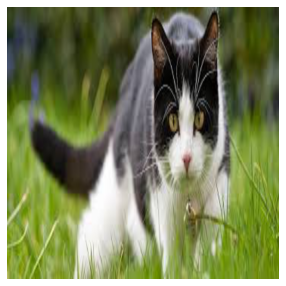

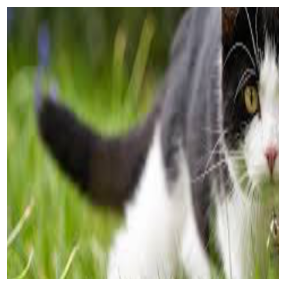

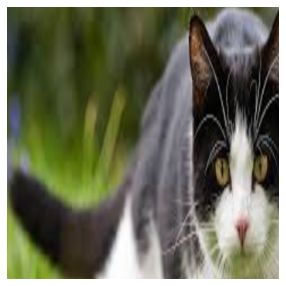

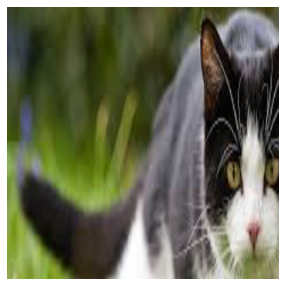

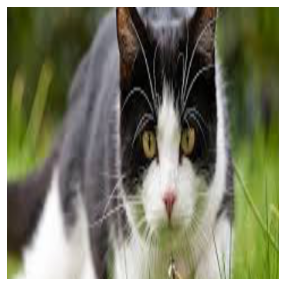

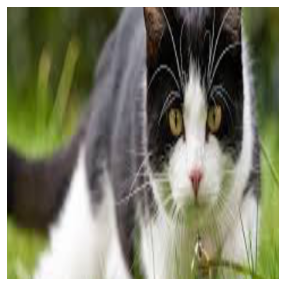

In [136]:
size = 400
cro = torchvision.transforms.RandomCrop((size,size))
show_image(ip)
for i in range(5):
    show_image(cro(ip))

In [109]:
torch.linspace(0.0, 0.3, 10)

tensor([0.0000, 0.0333, 0.0667, 0.1000, 0.1333, 0.1667, 0.2000, 0.2333, 0.2667,
        0.3000])

In [119]:
cifar10 = [
            ['Invert', 0.1, 7, 'Contrast', 0.2, 6],
            ['Rotate', 0.7, 2, 'TranslateX', 0.3, 9],
            ['Sharpness', 0.8, 1, 'Sharpness', 0.9, 3],
            ['ShearY', 0.5, 8, 'TranslateY', 0.7, 9],
            ['AutoContrast', 0.5, 8, 'Equalize', 0.9, 2],
            ['ShearY', 0.2, 7, 'Posterize', 0.3, 7],
            ['Color', 0.4, 3, 'Brightness', 0.6, 7],
            ['Sharpness', 0.3, 9, 'Brightness', 0.7, 9],
            ['Equalize', 0.6, 5, 'Equalize', 0.5, 1],
            ['Contrast', 0.6, 7, 'Sharpness', 0.6, 5],
            ['Color', 0.7, 7, 'TranslateX', 0.5, 8],
            ['Equalize', 0.3, 7, 'AutoContrast', 0.4, 8],
            ['TranslateY', 0.4, 3, 'Sharpness', 0.2, 6],
            ['Brightness', 0.9, 6, 'Color', 0.2, 8],
            ['Solarize', 0.5, 2, 'Invert', 0.0, 3],
            ['Equalize', 0.2, 0, 'AutoContrast', 0.6, 0],
            ['Equalize', 0.2, 8, 'Equalize', 0.6, 4],
            ['Color', 0.9, 9, 'Equalize', 0.6, 6],
            ['AutoContrast', 0.8, 4, 'Solarize', 0.2, 8],
            ['Brightness', 0.1, 3, 'Color', 0.7, 0],
            ['Solarize', 0.4, 5, 'AutoContrast', 0.9, 3],
            ['TranslateY', 0.9, 9, 'TranslateY', 0.7, 9],
            ['AutoContrast', 0.9, 2, 'Solarize', 0.8, 3],
            ['Equalize', 0.8, 8, 'Invert', 0.1, 3],
            ['TranslateY', 0.7, 9, 'AutoContrast', 0.9, 1],
        ]
imagenet = [
            ['Posterize', 0.4, 8, 'Rotate', 0.6, 9],
            ['Solarize', 0.6, 5, 'AutoContrast', 0.6, 10],
            ['Equalize', 0.8, 10, 'Equalize', 0.6, 10],
            ['Posterize', 0.6, 7, 'Posterize', 0.6, 6],
            ['Equalize', 0.4, 10, 'Solarize', 0.2, 4],
            ['Equalize', 0.4, 10, 'Rotate', 0.8, 8],
            ['Solarize', 0.6, 3, 'Equalize', 0.6, 10],
            ['Posterize', 0.8, 5, 'Equalize', 1.0, 10],
            ['Rotate', 0.2, 3, 'Solarize', 0.6, 8],
            ['Equalize', 0.6, 10, 'Posterize', 0.4, 6],
            ['Rotate', 0.8, 8, 'Color', 0.4, 0],
            ['Rotate', 0.4, 9, 'Equalize', 0.6, 10],
            ['Equalize', 0.0, 10, 'Equalize', 0.8, 10],
            ['Invert', 0.6, 10, 'Equalize', 1.0, 10],
            ['Color', 0.6, 4, 'Contrast', 1.0, 8],
            ['Rotate', 0.8, 8, 'Color', 1.0, 2],
            ['Color', 0.8, 8, 'Solarize', 0.8, 7],
            ['Sharpness', 0.4, 7, 'Invert', 0.6, 10],
            ['ShearX', 0.6, 5, 'Equalize', 1.0, 10],
            ['Color', 0.4, 0, 'Equalize', 0.6, 10],
            ['Equalize', 0.4, 10, 'Solarize', 0.2, 4],
            ['Solarize', 0.6, 5, 'AutoContrast', 0.6, 10],
            ['Invert', 0.6, 10, 'Equalize', 1.0, 10],
            ['Color', 0.6, 4, 'Contrast', 1.0, 8],
            ['Equalize', 0.8, 10, 'Equalize', 0.6, 10],
        ]
svhn = [
            ["ShearX", 0.9, 4, "Invert", 0.2, 10],
            ["ShearY", 0.9, 8, "Invert", 0.7, 10],
            ["Equalize", 0.6, 10, "Solarize", 0.6, 6],
            ["Invert", 0.9, 10, "Equalize", 0.6, 10],
            ["Equalize", 0.6, 10, "Rotate", 0.9, 3],
            ["ShearX", 0.9, 4, "AutoContrast", 0.8, 10],
            ["ShearY", 0.9, 8, "Invert", 0.4, 10],
            ["ShearY", 0.9, 5, "Solarize", 0.2, 6],
            ["Invert", 0.9, 10, "AutoContrast", 0.8, 10],
            ["Equalize", 0.6, 10, "Rotate", 0.9, 3],
            ["ShearX", 0.9, 4, "Solarize", 0.3, 3],
            ["ShearY", 0.8, 8, "Invert", 0.7, 10],
            ["Equalize", 0.9, 10, "TranslateY", 0.6, 6],
            ["Invert", 0.9, 10, "Equalize", 0.6, 10],
            ["Contrast", 0.3, 3, "Rotate", 0.8, 4],
            ["Invert", 0.8, 10, "TranslateY", 0.0, 2],
            ["ShearY", 0.7, 6, "Solarize", 0.4, 8],
            ["Invert", 0.6, 10, "Rotate", 0.8, 4],
            ["ShearY", 0.3, 7, "TranslateX", 0.9, 3],
            ["ShearX", 0.1, 6, "Invert", 0.6, 10],
            ["Solarize", 0.7, 2, "TranslateY", 0.6, 7],
            ["ShearY", 0.8, 4, "Invert", 0.8, 10],
            ["ShearX", 0.7, 9, "TranslateY", 0.8, 3],
            ["ShearY", 0.8, 5, "AutoContrast", 0.7, 10],
            ["ShearX", 0.7, 2, "Invert", 0.1, 10],
        ]
coco = [
      ['Equalize', 0.8, 1, 'ShearY', 0.8, 4],
      ['Color', 0.4, 9, 'Equalize', 0.6, 3],
      ['Color', 0.4, 1, 'Rotate', 0.6, 8],
      ['Solarize', 0.8, 3, 'Equalize', 0.4, 7],
      ['Solarize', 0.4, 2, 'Solarize', 0.6, 2],
      ['Color', 0.2, 0, 'Equalize', 0.8, 8],
      ['Equalize', 0.4, 8, 'SolarizeAdd', 0.8, 3],
      ['ShearX', 0.2, 9, 'Rotate', 0.6, 8],
      ['Color', 0.6, 1, 'Equalize', 1.0, 2],
      ['Invert', 0.4, 9, 'Rotate', 0.6, 0],
      ['Equalize', 1.0, 9, 'ShearY', 0.6, 3],
      ['Color', 0.4, 7, 'Equalize', 0.6, 0],
      ['Posterize', 0.4, 6, 'AutoContrast', 0.4, 7],
      ['Solarize', 0.6, 8, 'Color', 0.6, 9],
      ['Solarize', 0.2, 4, 'Rotate', 0.8, 9],
      ['Rotate', 1.0, 7, 'TranslateY', 0.8, 9],
      ['ShearX', 0.0, 0, 'Solarize', 0.8, 4],
      ['ShearY', 0.8, 0, 'Color', 0.6, 4],
      ['Color', 1.0, 0, 'Rotate', 0.6, 2],
      ['Equalize', 0.8, 4, 'Equalize', 0.0, 8],
      ['Equalize', 1.0, 4, 'AutoContrast', 0.6, 2],
      ['ShearY', 0.4, 7, 'SolarizeAdd', 0.6, 7],
      ['Posterize', 0.8, 2, 'Solarize', 0.6, 9],
      ['Solarize', 0.6, 8, 'Equalize', 0.6, 1],
      ['Color', 0.8, 6, 'Rotate', 0.4, 5],
        ]
cifar10.sort()
imagenet.sort()
svhn.sort()
coco.sort()

In [116]:
cifar10

[['AutoContrast', 0.5, 8, 'Equalize', 0.9, 2],
 ['AutoContrast', 0.8, 4, 'Solarize', 0.2, 8],
 ['AutoContrast', 0.9, 2, 'Solarize', 0.8, 3],
 ['Brightness', 0.1, 3, 'Color', 0.7, 0],
 ['Brightness', 0.9, 6, 'Color', 0.2, 8],
 ['Color', 0.4, 3, 'Brightness', 0.6, 7],
 ['Color', 0.7, 7, 'TranslateX', 0.5, 8],
 ['Color', 0.9, 9, 'Equalize', 0.6, 6],
 ['Contrast', 0.6, 7, 'Sharpness', 0.6, 5],
 ['Equalize', 0.2, 0, 'AutoContrast', 0.6, 0],
 ['Equalize', 0.2, 8, 'Equalize', 0.6, 4],
 ['Equalize', 0.3, 7, 'AutoContrast', 0.4, 8],
 ['Equalize', 0.6, 5, 'Equalize', 0.5, 1],
 ['Equalize', 0.8, 8, 'Invert', 0.1, 3],
 ['Invert', 0.1, 7, 'Contrast', 0.2, 6],
 ['Rotate', 0.7, 2, 'TranslateX', 0.3, 9],
 ['Sharpness', 0.3, 9, 'Brightness', 0.7, 9],
 ['Sharpness', 0.8, 1, 'Sharpness', 0.9, 3],
 ['ShearY', 0.2, 7, 'Posterize', 0.3, 7],
 ['ShearY', 0.5, 8, 'TranslateY', 0.7, 9],
 ['Solarize', 0.4, 5, 'AutoContrast', 0.9, 3],
 ['Solarize', 0.5, 2, 'Invert', 0.0, 3],
 ['TranslateY', 0.4, 3, 'Sharpness', 0

In [117]:
imagenet

[['Color', 0.4, 0, 'Equalize', 0.6, 10],
 ['Color', 0.6, 4, 'Contrast', 1.0, 8],
 ['Color', 0.6, 4, 'Contrast', 1.0, 8],
 ['Color', 0.8, 8, 'Solarize', 0.8, 7],
 ['Equalize', 0.0, 10, 'Equalize', 0.8, 10],
 ['Equalize', 0.4, 10, 'Rotate', 0.8, 8],
 ['Equalize', 0.4, 10, 'Solarize', 0.2, 4],
 ['Equalize', 0.4, 10, 'Solarize', 0.2, 4],
 ['Equalize', 0.6, 10, 'Posterize', 0.4, 6],
 ['Equalize', 0.8, 10, 'Equalize', 0.6, 10],
 ['Equalize', 0.8, 10, 'Equalize', 0.6, 10],
 ['Invert', 0.6, 10, 'Equalize', 1.0, 10],
 ['Invert', 0.6, 10, 'Equalize', 1.0, 10],
 ['Posterize', 0.4, 8, 'Rotate', 0.6, 9],
 ['Posterize', 0.6, 7, 'Posterize', 0.6, 6],
 ['Posterize', 0.8, 5, 'Equalize', 1.0, 10],
 ['Rotate', 0.2, 3, 'Solarize', 0.6, 8],
 ['Rotate', 0.4, 9, 'Equalize', 0.6, 10],
 ['Rotate', 0.8, 8, 'Color', 0.4, 0],
 ['Rotate', 0.8, 8, 'Color', 1.0, 2],
 ['Sharpness', 0.4, 7, 'Invert', 0.6, 10],
 ['ShearX', 0.6, 5, 'Equalize', 1.0, 10],
 ['Solarize', 0.6, 3, 'Equalize', 0.6, 10],
 ['Solarize', 0.6, 5, '

In [118]:
svhn

[['Contrast', 0.3, 3, 'Rotate', 0.8, 4],
 ['Equalize', 0.6, 10, 'Rotate', 0.9, 3],
 ['Equalize', 0.6, 10, 'Rotate', 0.9, 3],
 ['Equalize', 0.6, 10, 'Solarize', 0.6, 6],
 ['Equalize', 0.9, 10, 'TranslateY', 0.6, 6],
 ['Invert', 0.6, 10, 'Rotate', 0.8, 4],
 ['Invert', 0.8, 10, 'TranslateY', 0.0, 2],
 ['Invert', 0.9, 10, 'AutoContrast', 0.8, 10],
 ['Invert', 0.9, 10, 'Equalize', 0.6, 10],
 ['Invert', 0.9, 10, 'Equalize', 0.6, 10],
 ['ShearX', 0.1, 6, 'Invert', 0.6, 10],
 ['ShearX', 0.7, 2, 'Invert', 0.1, 10],
 ['ShearX', 0.7, 9, 'TranslateY', 0.8, 3],
 ['ShearX', 0.9, 4, 'AutoContrast', 0.8, 10],
 ['ShearX', 0.9, 4, 'Invert', 0.2, 10],
 ['ShearX', 0.9, 4, 'Solarize', 0.3, 3],
 ['ShearY', 0.3, 7, 'TranslateX', 0.9, 3],
 ['ShearY', 0.7, 6, 'Solarize', 0.4, 8],
 ['ShearY', 0.8, 4, 'Invert', 0.8, 10],
 ['ShearY', 0.8, 5, 'AutoContrast', 0.7, 10],
 ['ShearY', 0.8, 8, 'Invert', 0.7, 10],
 ['ShearY', 0.9, 5, 'Solarize', 0.2, 6],
 ['ShearY', 0.9, 8, 'Invert', 0.4, 10],
 ['ShearY', 0.9, 8, 'Invert

In [120]:
coco

[['Color', 0.2, 0, 'Equalize', 0.8, 8],
 ['Color', 0.4, 1, 'Rotate', 0.6, 8],
 ['Color', 0.4, 7, 'Equalize', 0.6, 0],
 ['Color', 0.4, 9, 'Equalize', 0.6, 3],
 ['Color', 0.6, 1, 'Equalize', 1.0, 2],
 ['Color', 0.8, 6, 'Rotate', 0.4, 5],
 ['Color', 1.0, 0, 'Rotate', 0.6, 2],
 ['Equalize', 0.4, 8, 'SolarizeAdd', 0.8, 3],
 ['Equalize', 0.8, 1, 'ShearY', 0.8, 4],
 ['Equalize', 0.8, 4, 'Equalize', 0.0, 8],
 ['Equalize', 1.0, 4, 'AutoContrast', 0.6, 2],
 ['Equalize', 1.0, 9, 'ShearY', 0.6, 3],
 ['Invert', 0.4, 9, 'Rotate', 0.6, 0],
 ['Posterize', 0.4, 6, 'AutoContrast', 0.4, 7],
 ['Posterize', 0.8, 2, 'Solarize', 0.6, 9],
 ['Rotate', 1.0, 7, 'TranslateY', 0.8, 9],
 ['ShearX', 0.0, 0, 'Solarize', 0.8, 4],
 ['ShearX', 0.2, 9, 'Rotate', 0.6, 8],
 ['ShearY', 0.4, 7, 'SolarizeAdd', 0.6, 7],
 ['ShearY', 0.8, 0, 'Color', 0.6, 4],
 ['Solarize', 0.2, 4, 'Rotate', 0.8, 9],
 ['Solarize', 0.4, 2, 'Solarize', 0.6, 2],
 ['Solarize', 0.6, 8, 'Color', 0.6, 9],
 ['Solarize', 0.6, 8, 'Equalize', 0.6, 1],
 ['So

In [122]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
import time
parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
score = 'f1_micro'

start=time.time()

classifier = GridSearchCV(MLkNN(), parameters, scoring=score)
classifier.fit(x_train, y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')
print('best parameters :', classifier.best_params_, 'best score: ',
      clf.best_score_)


NameError: name 'x_train' is not defined